<a href="https://colab.research.google.com/github/annaliese-estes/QFF-2024-example/blob/main/Magic8BallExampleAnswer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Magic 8 Ball

Here, we will build a Magic 8 Ball program that randomly returns 1 of 8 possible responses. How do we use quantum computing to generate a random number? Computational space scales exponentially in quantum computing. Thus, if we need a random result out of 8 possibilities, our program needs to take a measurement of a quantum state vector that consists of 8 basis states, which represent the computational space of 3 qubits in an equal superposition.

## Qiskit Patterns: Map Problem to Quantum Circuits and Operators

We can think of this step as mapping our problem to be run on a quantum computer. This step needs to be done for any quantum computation, because our instinct is to think of problems in a classical way, while quantum computers work differently.

Problem:
I need a program to generate a random number out of 8.

Mapping to a classical computer: generate a random integer in range(1,9)

Mapping to a quantum computer: put 3 qubits into an equal superposition, which creates a quantum state vector with 8 basis states, each with an equal probability of being the result of a measurement

In [ ]:
# install Qiskit with visualization

!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=9b68e565a0b48b5541d33da3975f3e6bdf5aa817be6c1286c6a2c7616d126085
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
# install additional packages

from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.primitives import StatevectorSampler
import math
import matplotlib.pyplot as plt

In [ ]:
# define Magic 8 Ball responses

responses = ["Yes", "Not today", "Definitely", "Try again", "Signs point to yes", "Not likely", "Sure thing!", "Outlook not so good"]

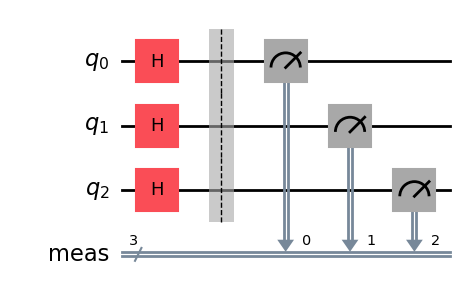

In [ ]:
# set up our Quantum circuit with 3 qubits
qc = QuantumCircuit(3)

# place a Hadamard gate on qubits 0, 1, and 2
qc.h(0)
qc.h(1)
qc.h(2)

# take a measurement
qc.measure_all()

qc.draw("mpl")

In [ ]:
# invoke the Sampler, run our circuit 1024 times to prove equal superposition, and display resulting measurements

sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=1024)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'000': 123, '100': 118, '110': 139, '010': 135, '011': 130, '101': 132, '111': 125, '001': 122}


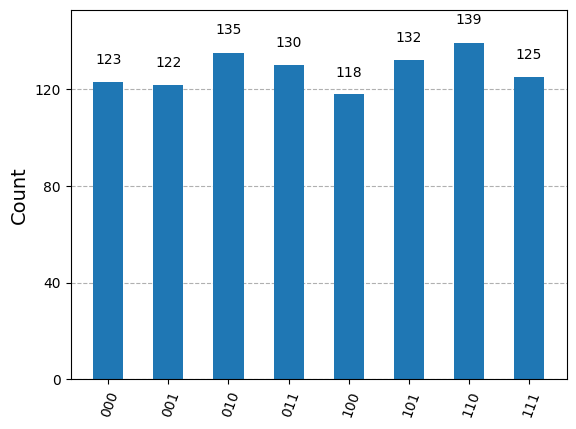

In [ ]:
# plot your results
plot_histogram(counts_sampler)

In [ ]:
# invoke the Sampler, run our circuit once to get a result for the Magic 8 Ball, and display resulting measurement

sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=1)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'111': 1}


In [ ]:
# accessing the first key of the dict item containing our results
first_key = list(counts_sampler.keys())[0]

# turning that string into an integer
# result is given in base 2, so we need to communicate that because the int() function assumes base 10 as default
integer_value = int(first_key, 2)

# returns our Magic 8 Ball response
print(responses[integer_value])

Outlook not so good


### Expanding on the Magic 8 Ball

increasing likelihood of positive or negative responses


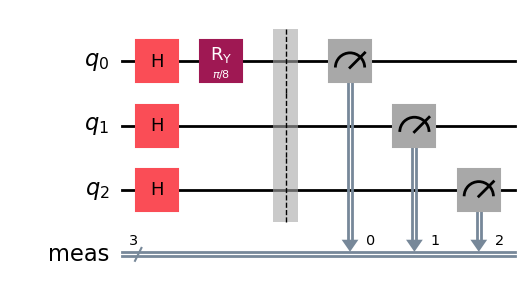

In [ ]:
qc = QuantumCircuit(3)

qc.h(0)
qc.h(1)
qc.h(2)

qc.ry(math.pi / 8, 0)

qc.measure_all()

qc.draw("mpl")

In [ ]:
# invoke the Sampler, run your circuit 1024 times to prove weighted superposition, and display resulting measurements

sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=1024)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'011': 184, '101': 192, '001': 175, '111': 166, '100': 59, '110': 81, '000': 94, '010': 73}


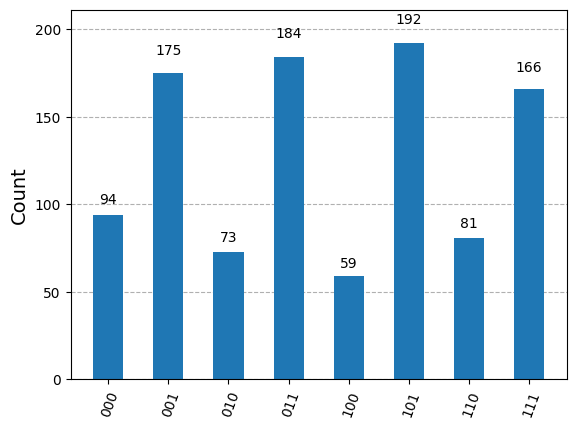

In [ ]:
# plot your results
plot_histogram(counts_sampler)

In [ ]:
# invoke the Sampler, run your circuit once to get a result for the Magic 8 Ball, and display resulting measurement

sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=1)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'010': 1}


In [ ]:
# accessing the first key of the dict item containing our results
first_key = list(counts_sampler.keys())[0]

# turning that string into an integer
# result is given in base 2, so we need to communicate that because the int() function assumes base 10 as default
integer_value = int(first_key, 2)

# returns our Magic 8 Ball response
print(responses[integer_value])

Definitely
